In [ ]:
# Commands to download the COCO dataset
# wget http://images.cocodataset.org/zips/train2017.zip
# wget http://images.cocodataset.org/zips/val2017.zip
# wget http://images.cocodataset.org/zips/test2017.zip
# wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

## Libraries

In [51]:
import importlib
import os
import sys

import matplotlib.pyplot as plt
import seedir
import yaml

sys.path.insert(0, '../src')
import dataset

importlib.reload(dataset)
from dataset import COCOSegmentationDataset

## Data exploration

In [52]:
external_disk_path = "/media/tiagociiic/easystore"
dataset_dir = os.path.join(external_disk_path, "COCO_dataset")
val_dir = os.path.join(dataset_dir, "val2017")
seedir.seedir(val_dir, itemlimit=3, style='lines', indent=4)

val2017/
├───000000000139.jpg
├───000000000285.jpg
└───000000000632.jpg


## COCOSegmentationDataset class testing

In [56]:
def show_image_and_mask(image, mask, denormalize=True, mean=None, std=None):
    image = image.permute(1, 2, 0).numpy()
    if denormalize:
        image = image * std + mean
    mask = mask.permute(1, 2, 0).numpy()
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    print(f"Image shape: {image.shape}, max: {image.max()}, min: {image.min()}")
    ax[0].imshow(image)
    ax[0].set_title('Image')
    print(f"Mask shape: {mask.shape}, max: {mask.max()}, min: {mask.min()}")
    ax[1].imshow(mask, cmap='tab20')
    ax[1].set_title('Mask')
    plt.show()


with open('../environment.yml', 'r') as f:
    config = yaml.safe_load(f)

coco_img_mean = config['vars']['COCO_IMG_MEAN']
coco_img_std = config['vars']['COCO_IMG_STD']

year = '2017'
image_size = (512, 512)
classes_ids = [0, 1]  # Person and bicycle



In [57]:
dataset = COCOSegmentationDataset(root_dir=dataset_dir,
                                  split='val',
                                  year=year,
                                  image_size=image_size,
                                  selected_class_ids=classes_ids)

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!
cocodataset: <pycocotools.coco.COCO object at 0x73c55d15fb80>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
Image shape: (512, 512, 3), max: 1.0000000236034394, min: -4.053115898461357e-09
Mask shape: (512, 512, 2), max: 0, min: 0


TypeError: Invalid shape (512, 512, 2) for image data

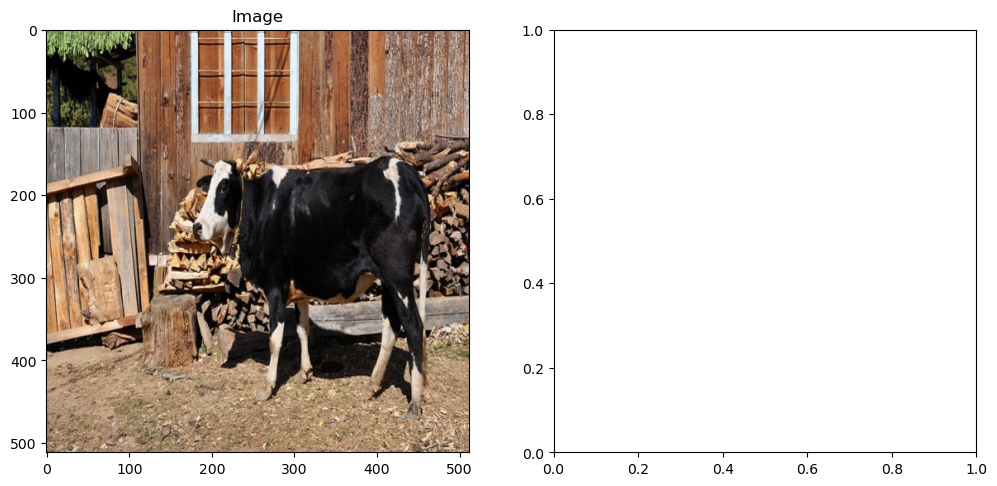

In [58]:
dataloader = DataLoader(dataset,
                        batch_size=2,
                        shuffle=True)

batch = next(iter(dataloader))
images = batch['image']
masks = batch['mask']
print(masks[0])

show_image_and_mask(images[0], masks[0], denormalize=True, mean=coco_img_mean, std=coco_img_std)

In [16]:
with open('../environment.yml', 'r') as f:
    config = yaml.safe_load(f)

coco_img_mean = config['vars']['COCO_IMG_MEAN']
coco_img_std = config['vars']['COCO_IMG_STD']
print(f"Image mean: {coco_img_mean}, std: {coco_img_std}")


Image mean: [0.485, 0.456, 0.406], std: [0.229, 0.224, 0.225]
